# Market Equilibrium under different market forms

Import various packages

In [10]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
from scipy import optimize,arange
from numpy import array

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Model Description

We consider the standard economic promlem for a Monopoly firm maximizing it's profits.

The aggregate market demand is given by
$$Q(p)=A-\alpha\cdot p$$
which corresponds to the inverse market demand function
$$p(Q)=\frac{A}{\alpha}-\frac{1}{\alpha}\cdot Q$$

and the Monopoly profits are given $$\pi(q)=p\cdot q-c(q)=\left(\frac{A}{\alpha}-\frac{1}{\alpha}\cdot q\right)\cdot q-c\cdot q$$

where $q=Q$, $p(Q)$ is a linear market demand curve and $c(q)$ is the firms cost-function with constants cost $c$. 

# Market Equilibrium

## Analytical Solution

Using Sympy, we seek to find an analytical expression for the market equilibrium when one firm has monopoly power, i.e. solve the monopoly firm's maximization problem

\\[ \max_{q}\pi(q)=\max_{q} \left(\frac{A}{\alpha}-\frac{1}{\alpha}\cdot q\right)\cdot q-c\cdot q \\]

Which has the standard solution given by:
$$q^{\ast}=\frac{A-\alpha\cdot c}{2}\wedge p^{\ast}=\frac{A+\alpha\cdot c}{2\cdot\alpha}$$

In [11]:
sm.init_printing(use_unicode=True) # sets printing on
# Defining variables;
A = sm.symbols('A')
q = sm.symbols('q')
c = sm.symbols('c')
alpha=sm.symbols('alpha')


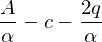

In [12]:
Pi = (A/alpha-q/alpha)*q-c*q # Define the firms profit function
F = sm.diff(Pi,q) # Take the first order condition
F


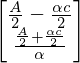

In [13]:
Mq = sm.solve(F,q)[0] # Solves for market quantiy
# And the market price is given by;
Mp=(A-Mq)*1/alpha
sm.Matrix([Mq,Mp]) # Prints the market quanty and price


In [14]:
#For later use, We turn the above solution into a Python function
Mq_func = sm.lambdify((A,alpha,c),Mq)
Mp_func = sm.lambdify((A,alpha,c),Mp)

## Numerical Solution

As a brief introduction to solving the problem numerically, we use a solver like fsolve to solve the first-order condition given the following parameter values:

Remember, the first-order condition is given by:
$$\frac{A}{\alpha}-c-\frac{2q}{\alpha}=0$$

In [15]:
A = 4
alpha = 2 
c = 1
output = optimize.fsolve(lambda q: 2-q-1,0)
print(f'analytical solution for market quanty is: {Mq_func(A,alpha,c):.2f}')
print(f' Solution with fsolve for market quanty is: {output}')
print(f'analytical solution for market price is: {Mp_func(A,alpha,c):.2f}')

analytical solution for market quanty is: 1.00
 Solution with fsolve for market quanty is: [1.]
analytical solution for market price is: 1.50


However for later use, It is perhaps more efficent to make Python maximize the firm's profits directly. However, as scipy only has minimization procedueres. We contunie to minimize $-\pi(q)$, i.e. minimizing negativ profits is the same as maximizing profits. 

Below we first define functions for market demand and costs in python

In [16]:
def demand(Q):
    return A/alpha-1/alpha*Q

def cost(q,c):  # c is constant marginal cost
    return c*q

In [39]:
def minus_profits(q,*args):         # we want to see profits as a function of q when we maximize profits or
    return -(demand(q)*q-cost(q,c)) # minimize minus_profits; hence c is specified as "*args", when calling fmin
                                    # we specify the c in the "args=(c,)"
x0 = 0 # Initial guess
c = 1.0 # Specify the value of the constant cost 'c'
A=4.0 # Specify the value of the Constant in the market demand function Q(p)
alpha=2.0 # Specify the  slope coefficient in Q(p)

output = optimize.fmin(minus_profits,x0,args=(c,)) # note the comma in "args(c,)"; it needs to be there!
price=A/alpha-1/alpha*output
print(output,price)

Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 25
         Function evaluations: 50
[1.] [1.5]


Hence, the optimal output to produce is 1, which yields the maximum profits of $-\cdot(-0.5)=0.5$

For the specified parameter values, we have plotted the monopoly firm's profit function below.

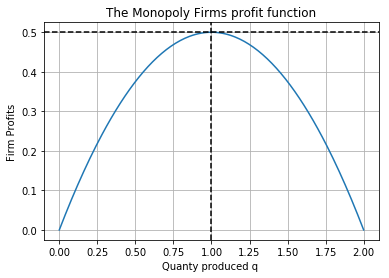

In [23]:
# Define the expression whose roots we want to find

A = 4.0 # Specify the value of the Constant in the market demand function Q(p) 
alpha = 2.0 # Specify the  slope coefficient in Q(p)
c = 1.0 # Specify the value of the constant cost 'c'

func = lambda q : (A/alpha-q/alpha)*q-c*q # Defines the profit function give using a lambda function.

# Plot the profit function

q = np.linspace(0, 2, 200) # Return evenly spaced numbers over a specified interval from 0 to 2 .

plt.plot(q, func(q)) 
plt.axhline(y=0.5,linestyle='dashed',color='k') # creates a horizontal line in the plot at func(q)=0.5
plt.axvline(x=1,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
plt.xlabel("Quanty produced q ")
plt.ylabel("Firm Profits")
plt.grid()
plt.title('The Monopoly Firms profit function')
plt.show()

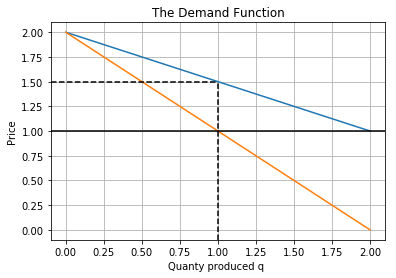

In [51]:
# Define marginal cost:
def MR(Q):
    return A/alpha-2/alpha*Q


plt.plot(q, demand(q)) 
plt.plot(q, MR(q))
plt.axhline(y=c,color='k') # creates a horizontal line in the plot at func(q)=0.5
plt.axvline(x=output,ymin=0,ymax=0.73,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
plt.axhline(y=price,xmin=0, xmax=0.5,linestyle='dashed',color='k')
plt.xlabel("Quanty produced q ")
plt.ylabel("Price")
plt.grid()
plt.title('The Demand Function')
plt.show()

Text(0.5, 1.0, 'The Demand Function')

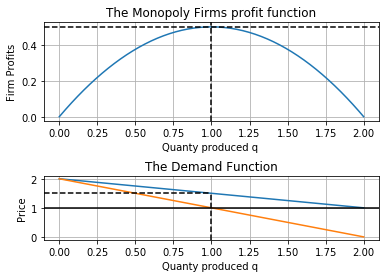

In [97]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')
fig = plt.figure()

plt.subplot(2, 1, 1)
plt.plot(q, func(q)) 
plt.axhline(y=0.5,linestyle='dashed',color='k') # creates a horizontal line in the plot at func(q)=0.5
plt.axvline(x=1,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
plt.xlabel("Quanty produced q ")
plt.ylabel("Firm Profits")
plt.grid()
plt.title('The Monopoly Firms profit function')

plt.subplot(3, 1, 3)
plt.plot(q, demand(q)) 
plt.plot(q, MR(q))
plt.axhline(y=c,color='k') # creates a horizontal line in the plot at func(q)=0.5
plt.axvline(x=output,ymin=0,ymax=0.73,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
plt.axhline(y=price,xmin=0, xmax=0.5,linestyle='dashed',color='k')
plt.xlabel("Quanty produced q ")
plt.ylabel("Price")
plt.grid()
plt.title('The Demand Function')


# Extentions: Solving for market equilibrium in a duopoly setting

## Market Equilibrium with Cournot Competition

Consider the inverse demand funcion with potential diffentiated goods
$$p_{i}(q_{i},q_{j})=1-q_{i}-bq_{j}$$

where $q_1$ is firm 1's output and $q_2$ is firm 2's output. $b\in[0,1]$

Both firms have identical cost-function $c(q_i)=c\cdot q_i$. So given cost and demand, each firm have the following profit function:
$$\pi_{i}(q_{i},q_{j})=p_i(q_i,q_j)q_i-c(q_i)$$,
$i,j\in\{0,1\},i\neq j$

### Numerical Solution

In [10]:
def demand(q1,q2,b): # Define demand 
    return 2-q1-b*q2

def cost(q,c):
    if q == 0:
     cost = 0
    else:
     cost = c*q
    return cost

In [16]:
def profit(q1,q2,c1,b): # Define a function for profits
    return demand(q1,q2,b)*q1-cost(q1,c1)

See below (test9

In [2]:
c = 0.0
max_N = 5

def demand(q,Q_others):
    return max(0,1-q-b*Q_others)

def cost(q):
    return c*q

def profit(q,Q_others):
    return demand(q,Q_others)*q-cost(q)

In [3]:
# Equilibrium number of firms;
def number_of_firms(profit,f): # profit is a function here
    for i in range(max_N+1): # if max_N = 5, we need range (0,1,2,3,4,5) = range(max_N+1)
        if profit(i+1)-f < 0:
            break
        else: continue
    return i

In [10]:
b = 1.0
f=0.1
def profit(q,Q_others):
    return demand(q,Q_others)*q-cost(q)

def reaction(Q_others):
    q =  optimize.fminbound(lambda x, Q_others = Q_others: -profit(x,Q_others),0,1,full_output=1)
    if q[1] > 0: # because of minus sign: fval > 0 implies that profit < 0: better produce nothing
        q_i = 0
    else:
        q_i = q[0]
    return q_i

def fixed_point(vector_q):
    total_q = sum(vector_q)
    vector_reaction = [reaction(total_q-vector_q[i]) for i in range(len(vector_q))]
    return vector_q-vector_reaction

def profits_Cournot(n):
    x0 = array([0.1 for i in range(n)])
    output = optimize.root(fixed_point, x0, args=(), method='hybr', jac=None, tol=10**(-10), callback=None, options=None).x[0]
    return profit(output,(n-1)*output)

def outcome_Cournot(f):
    n = number_of_firms(profits_Cournot,f)
    if n == 0:
        print("no firm is active, price is undetermined")
        price = "n.a"
    else:
        x0 = [0.1 for i in range(n)]
        output = optimize.root(fixed_point, x0, args=(), method='hybr', jac=None, tol=10**(-10), callback=None, options=None).x[0]
        price = demand(output,(n-1)*output)
    return [price,output]

print("The equilibrium price under Cournot competition with f =", f, "equals:", outcome_Cournot(0.1)[0])


The equilibrium price under Cournot competition with f = 0.1 equals: 0.3333333333333334


## Market Equilibrium with Betrand Competition

# Conclusion

We see that the assumption about the market structure have a critical impact on the market equilibrium. We have shown that under the standard assumption, when there is only on firm in market, which utilizes it's monopoly power, the market equilibrium output is inefficiently low and the equilibrium price is ineffciently high from a social welfare perspective. When the number of firms increases to two, we show that the market inefficiency decreases but at different degrees depending on competition type. If the firms compete in quanties (Cournot), the market output is still lower than the social optimum, however there is still some competition between the firms, which results in a lower market price and higher market output compared to the monopoly case. Lastly, we show that when the two firms compete in prices(bertrand) the market equilibrium is parato efficient. As both firms seek to undercut the other firm resulting in both firms asking a price equal to their margianl costs (assumed identical). Hence even though their are only two firms, the market equilibrium is efficient as it is identical to social optimum with a market price equal to the marginal costs.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


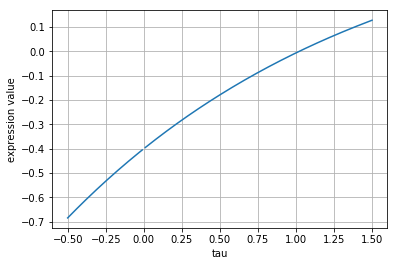

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the expression whose roots we want to find

a = 0.5
R = 1.6

func = lambda tau : R - ((1.0 - np.exp(-tau))/(1.0 - np.exp(-a*tau))) 

# Plot it

tau = np.linspace(-0.5, 1.5, 201)

plt.plot(tau, func(tau))
plt.xlabel("tau")
plt.ylabel("expression value")
plt.grid()
plt.show()

# Use the numerical solver to find the roots

#tau_initial_guess = 0.5
#tau_solution = fsolve(func, tau_initial_guess)

#print("The solution is tau = %f" % tau_solution)
#print("at which the value of the expression is %f" % func(tau_solution))